# Exploratory Data Analysis of Titanic Survivors

#### The aim of EDA is to analysis what sorts of people were likely to survive. In particular, passengers who survived the tragedy and who could not from different features like age, gender, class, and survival. 

###### Start by looking at what data looks like and get an overview. 

In [1]:
#Import pandas for data manipulation
import pandas as pd
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read titanic training data set from csv file into pandas train dataframe
train_data = pd.read_csv('/Users/radhikasrinivasan/AnacondaProjects/titanic_train.csv')

#Read titanic testing data set from csv file into pandas test dataframe
test_data = pd.read_csv('/Users/radhikasrinivasan/AnacondaProjects/titanic_test.csv')

#### Data Analysis

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### The training dataset has 891 records and 12 columns. 
##### Survived is the target variable. 
survival| Survival | 0 = No, 1 = Yes  
pclass| Ticket class| A proxy for socio-economic status (SES) 1st = Upper | 2nd = Middle | 3rd = Lower         
sex | Sex	 ||  Age|Age in years	
sibsp  |# of siblings / spouses aboard the Titanic	
parch  |# of parents / children aboard the Titanic         
ticket |Ticket number
Embarked | Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### From the above, we can see that only 38% out of the training dataset survived the Titanic. 
#### Passenger's age ranges from 0.4 to 80. Age has missing values only 714 records there are. 
##### Oldest passenger survived was 80, while the youngest was 0.42 and mean average age was 29 years. 
#### Pclass has class1, class2 and class3. 
#### Fares varied significantly. The upper quartile was 31 and mean fare was 32 but only few passengers paid the max fare of 512
#### In Parch 1 signifies for every parent or child on board while 0 signifies children who travelled with nannies

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the table above, we see wide range of data and missing values (NaN). Survived column has 0 & 1 values where 1 is survived and 0 is deceased.

In [6]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
train_data['Age'].min(), train_data['Age'].max()

(0.42, 80.0)

In [8]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
NaNTotal = train_data.isnull().sum().sort_values(ascending = False).head(5)

In [11]:
NaNTotal

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
dtype: int64

In [12]:
p1 = train_data.isnull().sum()/train_data.isnull().count() * 100
p2 = (round(p1, 1)).sort_values(ascending = False) 
NaNdata = pd.concat([NaNTotal, p2], axis = 1, keys = ['   Total Value', '%'])
NaNdata.head(5)

,Total Value,%
Age,177.0,19.9
Cabin,687.0,77.1
Embarked,2.0,0.2
Fare,0.0,0.0
Name,NaN,0.0


From table above, Cabin has 77% of missing values followed by Age with a 19% and Embarked with a least of 2 values. Dropping is not a good idea so we need to think of a better idea.   

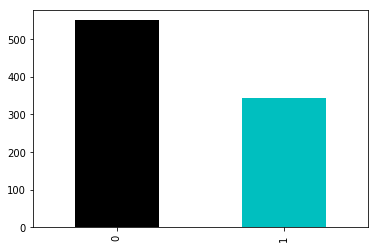

In [13]:
%matplotlib inline
train_data['Survived'].value_counts().plot(kind='bar', color = ['k', 'c'])

It is evidence from the plot that number of people who survived are less than who didn't. More than 300 passengers survived while deceased are more than 500. 

In [14]:
train_data['Survived'].value_counts(), train_data['Age'].value_counts()

(0    549
 1    342
 Name: Survived, dtype: int64, 24.00    30
 22.00    27
 18.00    26
 19.00    25
 30.00    25
 28.00    25
 21.00    24
 25.00    23
 36.00    22
 29.00    20
 32.00    18
 27.00    18
 35.00    18
 26.00    18
 16.00    17
 31.00    17
 20.00    15
 33.00    15
 23.00    15
 34.00    15
 39.00    14
 17.00    13
 42.00    13
 40.00    13
 45.00    12
 38.00    11
 50.00    10
 2.00     10
 4.00     10
 47.00     9
          ..
 71.00     2
 59.00     2
 63.00     2
 0.83      2
 30.50     2
 70.00     2
 57.00     2
 0.75      2
 13.00     2
 10.00     2
 64.00     2
 40.50     2
 32.50     2
 45.50     2
 20.50     1
 24.50     1
 0.67      1
 14.50     1
 0.92      1
 74.00     1
 34.50     1
 80.00     1
 12.00     1
 36.50     1
 53.00     1
 55.50     1
 70.50     1
 66.00     1
 23.50     1
 0.42      1
 Name: Age, Length: 88, dtype: int64)

From the observation above, 342 passengers survived the tragedy and 549 did not survive.

We can infer from the plot that male passengers were more in number when compared to the female passengers.

In [15]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


From the above, observation it is clear that Female had a high survival rate of 74%.

In [16]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

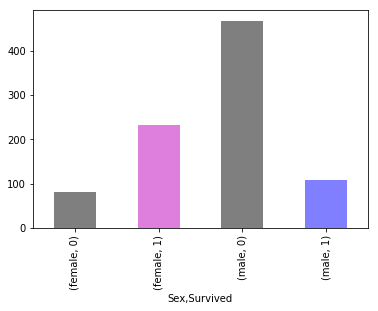

In [17]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count().sort_index().plot(kind='bar', color = ['k', 'm','k','b'], alpha = 0.5)

We can see the survival numbers and survival rate by gender

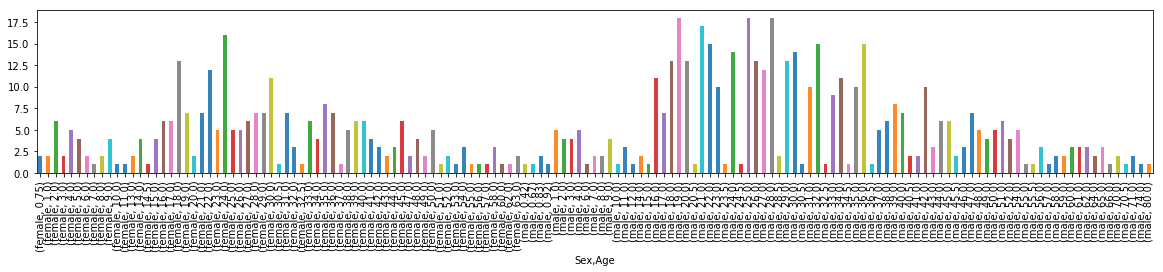

In [18]:
train_data.groupby(['Sex', 'Age'])['Age'].count().sort_index().plot(kind='bar', alpha = 0.9, figsize = (20,3))

In [19]:
crossAna = pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass, margins=True)

In [20]:
crossAna.style.background_gradient(cmap = 'summer_r')

#### From the above, we can infer that 233 female passengers survived out of 344 and 109 survived out of 577 male. 
###### The survival rate of female is much higher than that of male passengers.       
###### Pclass 1 female survivors is  highest when compare to Pclass 2 and Pclass3 female passengers.
###### 300 Male passenger did not survive in Pclass 3 which has the highest death rate in comparison with Pclass 2 and Pclass 3. 

In [21]:
train_data[["Age",  "Survived"]].groupby(['Age'], as_index=False).sum().sort_values(by ='Survived', ascending=False)

,Age,Survived
31,24.00,15
28,22.00,11
35,27.00,11
48,36.00,11
47,35.00,11
39,30.00,10
42,32.00,9
24,19.00,9
23,18.00,9
41,31.00,8


In [22]:
train_data['Survived'].value_counts(), train_data['Age'].value_counts()

(0    549
 1    342
 Name: Survived, dtype: int64, 24.00    30
 22.00    27
 18.00    26
 19.00    25
 30.00    25
 28.00    25
 21.00    24
 25.00    23
 36.00    22
 29.00    20
 32.00    18
 27.00    18
 35.00    18
 26.00    18
 16.00    17
 31.00    17
 20.00    15
 33.00    15
 23.00    15
 34.00    15
 39.00    14
 17.00    13
 42.00    13
 40.00    13
 45.00    12
 38.00    11
 50.00    10
 2.00     10
 4.00     10
 47.00     9
          ..
 71.00     2
 59.00     2
 63.00     2
 0.83      2
 30.50     2
 70.00     2
 57.00     2
 0.75      2
 13.00     2
 10.00     2
 64.00     2
 40.50     2
 32.50     2
 45.50     2
 20.50     1
 24.50     1
 0.67      1
 14.50     1
 0.92      1
 74.00     1
 34.50     1
 80.00     1
 12.00     1
 36.50     1
 53.00     1
 55.50     1
 70.50     1
 66.00     1
 23.50     1
 0.42      1
 Name: Age, Length: 88, dtype: int64)

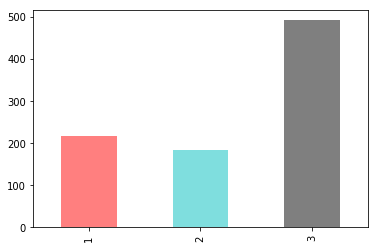

In [23]:
train_data['Pclass'].value_counts().sort_index().plot(kind='bar', color = ['r', 'c','k'], alpha = 0.5)

Class3 has the highest number of passengers while class2 being the lowest and class 1 being slightly more than class2. 

In [24]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


From the above, observation there is a significant correlation between Pclass and Survived. 
Even though Class3 had the highest number of passengers only 24 survived while at class1 62 survived. 

In [25]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


From the observation above, they have zero correlation for certain values so it is best to look at it individually.

In [26]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


From the observation above, they have zero correlation for certain values so it is best to look at individually.

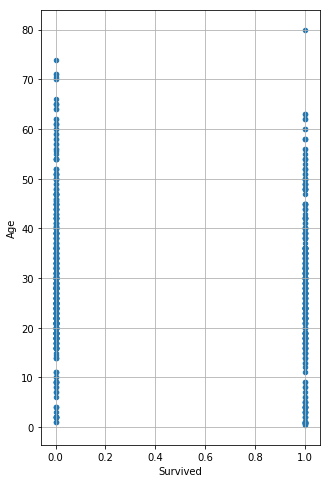

In [27]:
train_data.plot(kind='scatter', x='Survived', y='Age',grid=True, figsize = (5,8))

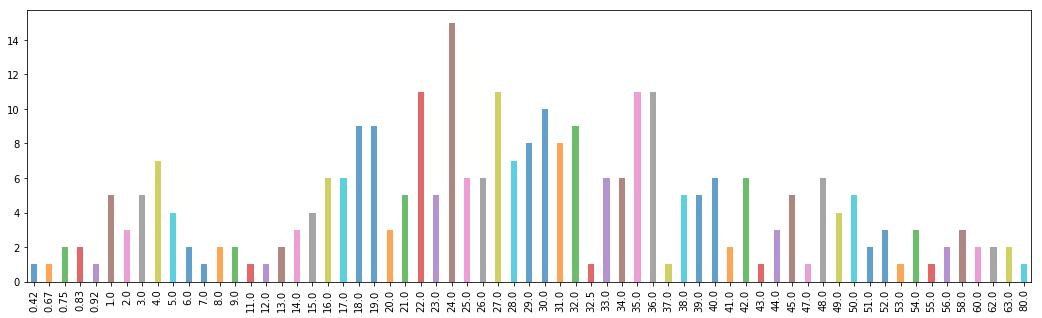

In [28]:
train_data[train_data['Survived'] == 1]['Age'].value_counts().sort_index().plot(kind='bar',width= 0.4, alpha = 0.7, figsize = (18,5))

It looks like survival rates were highest for those in their twenties and thirties. There is an another, considerably smaller peak for very young and drip for the old. Oldest passenger who survived was 80 years old.

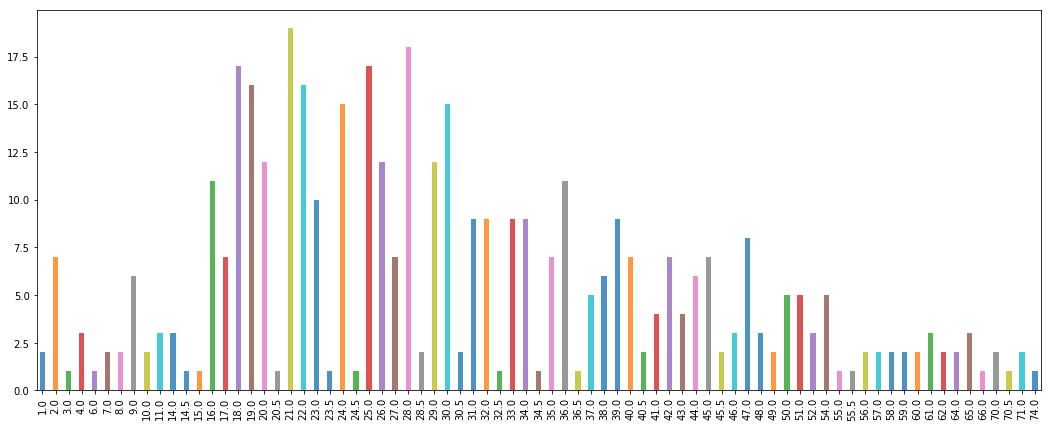

In [29]:
train_data[train_data['Survived'] == 0]['Age'].value_counts().sort_index().plot(kind='bar',width= 0.4, alpha = 0.8, figsize = (18,7))

Highest death rate was among passengers who were aged 21 years. Mostly, those aged between 18-28 years old did not survive.

In [30]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
train_data['AgeBin'] = pd.cut(train_data['Age'], bins)

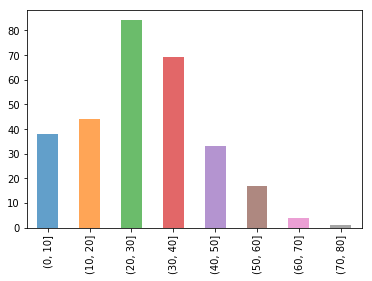

In [31]:
train_data[train_data['Survived']==1]['AgeBin'].value_counts().sort_index().plot(kind='bar', alpha = 0.7)

20-30 age range were the highest survivers

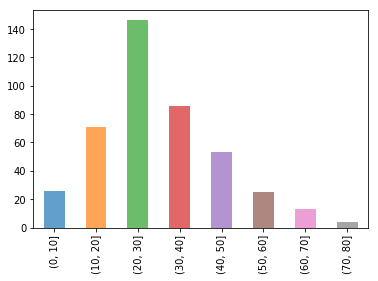

In [32]:
train_data[train_data['Survived']==0]['AgeBin'].value_counts().sort_index().plot(kind='bar', alpha = 0.7)

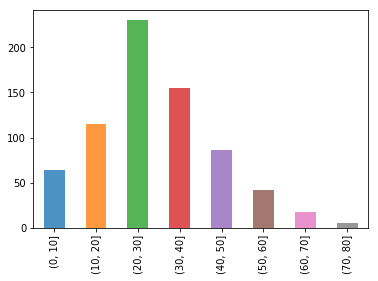

In [33]:
train_data['AgeBin'].value_counts().sort_index().plot(kind='bar', alpha = 0.8)

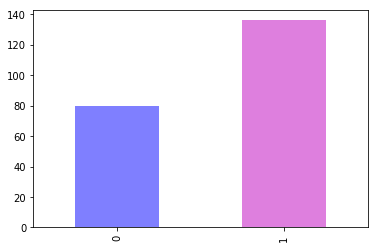

In [34]:
train_data[train_data['Pclass']==1]['Survived'].value_counts().sort_index().plot(kind='bar', color = ['b', 'm'], alpha = 0.5)

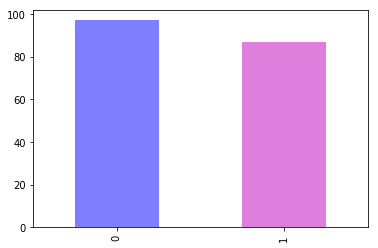

In [35]:
train_data[train_data['Pclass']==2]['Survived'].value_counts().sort_index().plot(kind='bar', color = ['b', 'm'], alpha = 0.5)

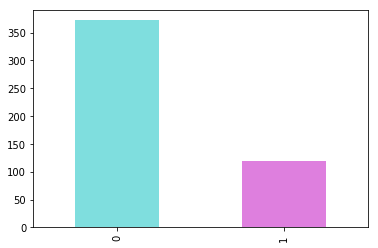

In [36]:
train_data[train_data['Pclass']==3]['Survived'].value_counts().sort_index().plot(kind='bar', color = ['c', 'm'], alpha = 0.5)

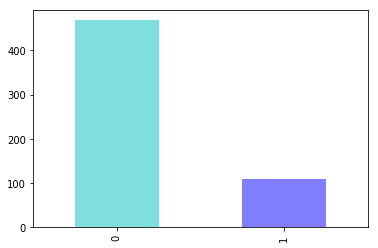

In [37]:
train_data[train_data['Sex']=='male']['Survived'].value_counts().sort_index().plot(kind='bar', color = ['c', 'b'], alpha = 0.5)

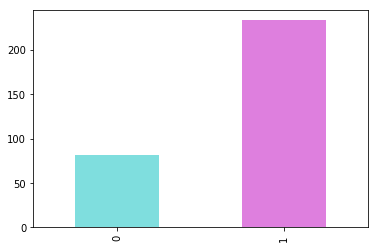

In [38]:
train_data[train_data['Sex']=='female']['Survived'].value_counts().sort_index().plot(kind='bar', color = ['c', 'm'], alpha = 0.5)

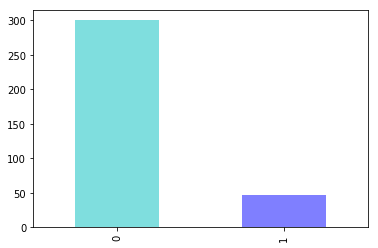

In [39]:
train_data[(train_data['Sex']=='male') & (train_data['Pclass']==3)]['Survived'].value_counts().sort_index().plot(kind='bar', color = ['c', 'b'], alpha = 0.5)

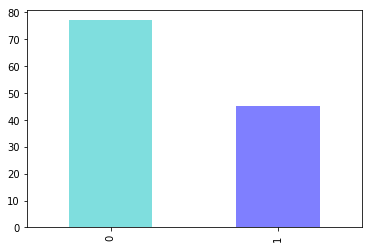

In [40]:
train_data[(train_data['Sex']=='male') & (train_data['Pclass']==1)]['Survived'].value_counts().sort_index().plot(kind='bar',color = ['c', 'b'], alpha = 0.5)

Male passengers survival rate is better than the male passengers in class2 and class3

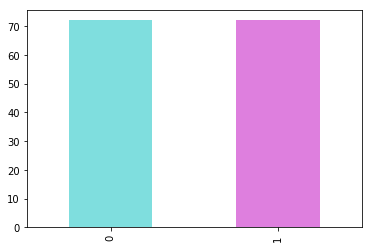

In [41]:
train_data[(train_data['Sex']=='female') & (train_data['Pclass']==3)]['Survived'].value_counts().sort_index().plot(kind='bar', color = ['c', 'm'], alpha = 0.5)

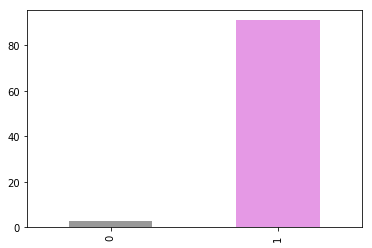

In [42]:
train_data[(train_data['Sex']=='female') & (train_data['Pclass']==1)]['Survived'].value_counts().sort_index().plot(kind='bar', color = ['k', 'm'], alpha = 0.4)

Female passengers survival rate is higher than the male passengers in class 1

#### The PassengerId and Ticket columns can be dropped as they do not contribute in making our prediction.

In [43]:
# Drop PassengerId amd Ticket Number from training set 
train_data = train_data.drop(["PassengerId", "Ticket"], axis = 1)

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
AgeBin      714 non-null category
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 70.7+ KB


In [45]:
train_data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Cabin,Survived
63,C23 C25 C27,4
145,G6,4
47,B96 B98,4
141,F2,3
62,C22 C26,3
116,E101,3
142,F33,3
90,D,3
78,C78,2
35,B57 B59 B63 B66,2


In [46]:
crossAna1 = pd.crosstab([train_data.Survived, train_data.Pclass],train_data.Cabin, margins=True)
crossAna1.style.background_gradient(cmap = 'Purples')

In [47]:
crossAna2 = pd.crosstab([train_data.SibSp, train_data.Parch],train_data.Survived, margins=True)
crossAna2.style.background_gradient(cmap = 'summer_r')


In [48]:
crossAna2 = pd.crosstab([train_data.Embarked],train_data.Survived, margins=True)
crossAna2.style.background_gradient(cmap = 'YlOrBr_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [49]:
crossAna3 = pd.crosstab([train_data.Embarked, train_data.Survived],train_data.Age, margins=True)
crossAna3.style.background_gradient(cmap = 'YlOrBr')

In [50]:
crossAna4 = pd.crosstab([train_data.SibSp], train_data.Parch, margins=True)
crossAna4.style.background_gradient(cmap = 'Blues')



Parch,0,1,2,3,4,5,6,All
SibSp,,,,,,,,
0,537,38,29,1,1,2,0,608
1,123,57,19,3,3,3,1,209
2,16,7,4,1,0,0,0,28
3,2,7,7,0,0,0,0,16
4,0,9,9,0,0,0,0,18
5,0,0,5,0,0,0,0,5
8,0,0,7,0,0,0,0,7
All,678,118,80,5,4,5,1,891


In [51]:
crossAna3 = pd.crosstab([train_data.Survived], train_data.SibSp, margins=True)
crossAna3.style.background_gradient(cmap = 'Accent') #GnBu

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


From the above, it is evident that as the number of siblings increased there was a drop in survival rate. There is a drastic drip with 2 siblings and more. Larger the family size (5 or more) survival rate is 0.

In [52]:
crossAna5 = pd.crosstab([train_data.Pclass], train_data.SibSp, margins=True)
crossAna5.style.background_gradient(cmap = 'Wistia')

SibSp,0,1,2,3,4,5,8,All
Pclass,,,,,,,,
1,137,71,5,3,0,0,0,216
2,120,55,8,1,0,0,0,184
3,351,83,15,12,18,5,7,491
All,608,209,28,16,18,5,7,891


It is clear that SibSp of 4 or above were in Pclass3.    

In [53]:
crossAna2 = pd.crosstab([train_data.Parch], train_data.Survived, margins=True)
crossAna2.style.background_gradient(cmap = 'YlOrBr')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


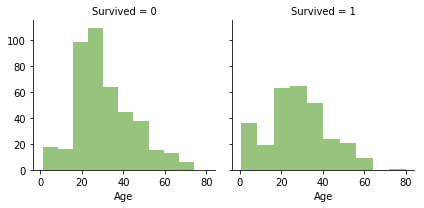

In [54]:
grid1 = sns.FacetGrid(train_data, col = 'Survived')
grid1.map(plt.hist, 'Age', bins = 10, color="#338800", alpha = .5)

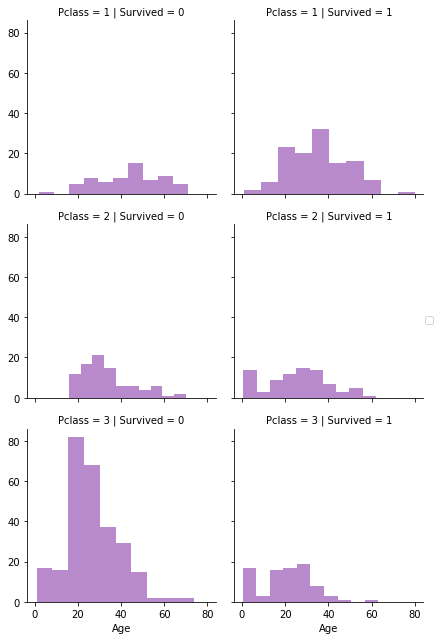

In [55]:
grid2 = sns.FacetGrid(train_data, col = 'Survived', row = 'Pclass')
grid2.map(plt.hist, 'Age', bins = 10, color="#9b59b6", alpha = 0.7)
grid2.add_legend()

/Users/radhikasrinivasan/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/radhikasrinivasan/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


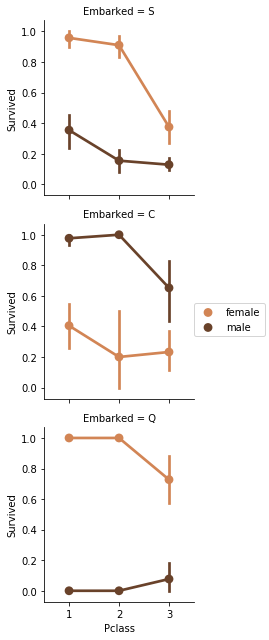

In [56]:
grid3 = sns.FacetGrid(train_data, row='Embarked')
grid3.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='copper')
grid3.add_legend()

/Users/radhikasrinivasan/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


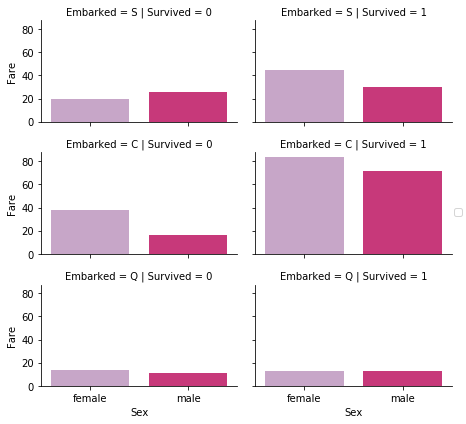

In [57]:
grid4 = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2, aspect=1.6)
grid4.map(sns.barplot, 'Sex', 'Fare', alpha=1, palette='PuRd',ci=None)
grid4.add_legend()